In [75]:
import matplotlib.pyplot as plt
font = {'size' : 14}
import matplotlib
matplotlib.rc('font', **font)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import random

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from geopy.geocoders import Nominatim

In [3]:
# Lectura del archivo ' AIR QUALITY'

air_quality = pd.read_csv ('DATASETS\Air_Quality_20231207.csv')
air_quality.head(5)


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN


In [4]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16218 entries, 0 to 16217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16218 non-null  int64  
 1   Indicator ID    16218 non-null  int64  
 2   Name            16218 non-null  object 
 3   Measure         16218 non-null  object 
 4   Measure Info    16218 non-null  object 
 5   Geo Type Name   16218 non-null  object 
 6   Geo Join ID     16218 non-null  int64  
 7   Geo Place Name  16218 non-null  object 
 8   Time Period     16218 non-null  object 
 9   Start_Date      16218 non-null  object 
 10  Data Value      16218 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


In [5]:
# Verificar si hay valores nulos en todo el DataFrame
valores_nulos = air_quality.isnull().any().any()

if valores_nulos:
    print("¡Hay valores nulos en el DataFrame!")
    # Muestra la cantidad de valores nulos por columna
    print(air_quality.isnull().sum())
else:
    print("No hay valores nulos en el DataFrame.")

¡Hay valores nulos en el DataFrame!
Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           0
Geo Place Name        0
Time Period           0
Start_Date            0
Data Value            0
Message           16218
dtype: int64


In [6]:
# Elimino columna 'Message'


air_quality = air_quality.drop('Message', axis=1)

# Verifico que la columna se haya eliminado
print(air_quality.head())


   Unique ID  Indicator ID                    Name Measure Measure Info  \
0     172653           375  Nitrogen dioxide (NO2)    Mean          ppb   
1     172585           375  Nitrogen dioxide (NO2)    Mean          ppb   
2     336637           375  Nitrogen dioxide (NO2)    Mean          ppb   
3     336622           375  Nitrogen dioxide (NO2)    Mean          ppb   
4     172582           375  Nitrogen dioxide (NO2)    Mean          ppb   

  Geo Type Name  Geo Join ID                      Geo Place Name  \
0         UHF34          203  Bedford Stuyvesant - Crown Heights   
1         UHF34          203  Bedford Stuyvesant - Crown Heights   
2         UHF34          204                       East New York   
3         UHF34          103                  Fordham - Bronx Pk   
4         UHF34          104                Pelham - Throgs Neck   

           Time Period  Start_Date  Data Value  
0  Annual Average 2011  12/01/2010       25.30  
1  Annual Average 2009  12/01/2008       2

In [42]:
# Lectura del archivo 'ENERGY' 

df_energy = pd.read_csv ('DATASETS\energy.csv')
df_energy.head(20)

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000
5,5,World,renewables_n_other,1980,20.702344,20.775178,27770.910281,4.298127e+06,68.145921,10.547,0.000000
6,6,Afghanistan,all_energy_types,1980,0.026583,0.072561,NaN,1.335650e+04,1.990283,0.000,NaN
7,7,Afghanistan,coal,1980,0.002479,0.002355,NaN,1.335650e+04,1.990283,0.000,NaN
8,8,Afghanistan,natural_gas,1980,0.002094,0.062820,NaN,1.335650e+04,1.990283,0.000,NaN
9,9,Afghanistan,petroleum_n_other_liquids,1980,0.014624,0.000000,NaN,1.335650e+04,1.990283,0.000,NaN


In [43]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   55440 non-null  int64  
 1   Country                      55440 non-null  object 
 2   Energy_type                  55440 non-null  object 
 3   Year                         55440 non-null  int64  
 4   Energy_consumption           44287 non-null  float64
 5   Energy_production            44289 non-null  float64
 6   GDP                          40026 non-null  float64
 7   Population                   46014 non-null  float64
 8   Energy_intensity_per_capita  50358 non-null  float64
 9   Energy_intensity_by_GDP      50358 non-null  float64
 10  CO2_emission                 51614 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 4.7+ MB


In [44]:
# Verificar si hay valores nulos en todo el DataFrame
valores_nulos = df_energy.isnull().any().any()

if valores_nulos:
    print("¡Hay valores nulos en el DataFrame!")
    # Muestra la cantidad de valores nulos por columna
    print(df_energy.isnull().sum())
else:
    print("No hay valores nulos en el DataFrame.")

¡Hay valores nulos en el DataFrame!
Unnamed: 0                         0
Country                            0
Energy_type                        0
Year                               0
Energy_consumption             11153
Energy_production              11151
GDP                            15414
Population                      9426
Energy_intensity_per_capita     5082
Energy_intensity_by_GDP         5082
CO2_emission                    3826
dtype: int64


In [48]:
df_energy.dropna (inplace=True)

In [49]:
df_energy.isnull().any()

Unnamed: 0                     False
Country                        False
Energy_type                    False
Year                           False
Energy_consumption             False
Energy_production              False
GDP                            False
Population                     False
Energy_intensity_per_capita    False
Energy_intensity_by_GDP        False
CO2_emission                   False
dtype: bool

In [51]:
# Verificar si hay valores nulos en todo el DataFrame
valores_nulos = df_energy.isnull().any().any()

if valores_nulos:
    print("¡Hay valores nulos en el DataFrame!")
    # Muestra la cantidad de valores nulos por columna
    print(df_energy.isnull().sum())
else:
    print("No hay valores nulos en el DataFrame.")

No hay valores nulos en el DataFrame.


In [52]:
df_energy.describe()

,Unnamed: 0,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
count,33305.000000,33305.000000,33305.000000,3.330500e+04,33305.000000,3.330500e+04,33305.000000,33305.000000,33305.000000
mean,32248.035850,2002.776250,1.960963,1.940987e+00,967.855247,8.185787e+04,87.017289,4.780364,117.359992
std,13915.190442,10.037084,17.753187,1.755388e+01,6547.095969,5.342528e+05,118.165225,4.277883,1117.957350
min,0.000000,1980.000000,-0.163438,-1.000000e-39,0.124958,1.615500e+01,0.000000,0.000000,-0.005130
25%,21047.000000,1995.000000,0.001196,0.000000e+00,11.652200,2.029830e+03,10.672676,2.436436,0.000000
50%,32761.000000,2003.000000,0.040328,4.748380e-03,58.035000,7.854220e+03,45.644371,3.838103,0.591826
75%,44139.000000,2011.000000,0.353622,1.972639e-01,307.280300,2.486268e+04,118.385300,5.840409,14.000000
max,55439.000000,2019.000000,601.040490,6.115090e+02,127690.247059,7.714631e+06,1139.320598,166.913605,35584.933498


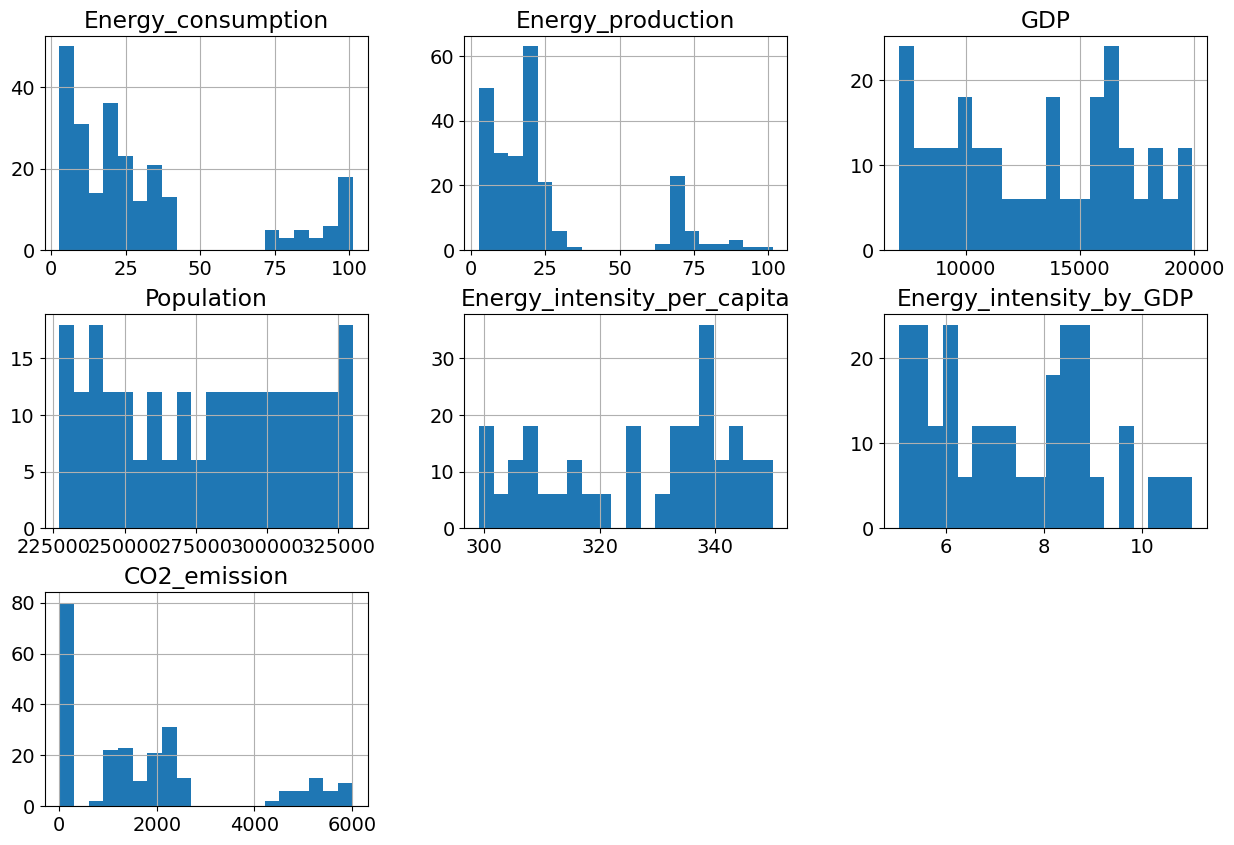

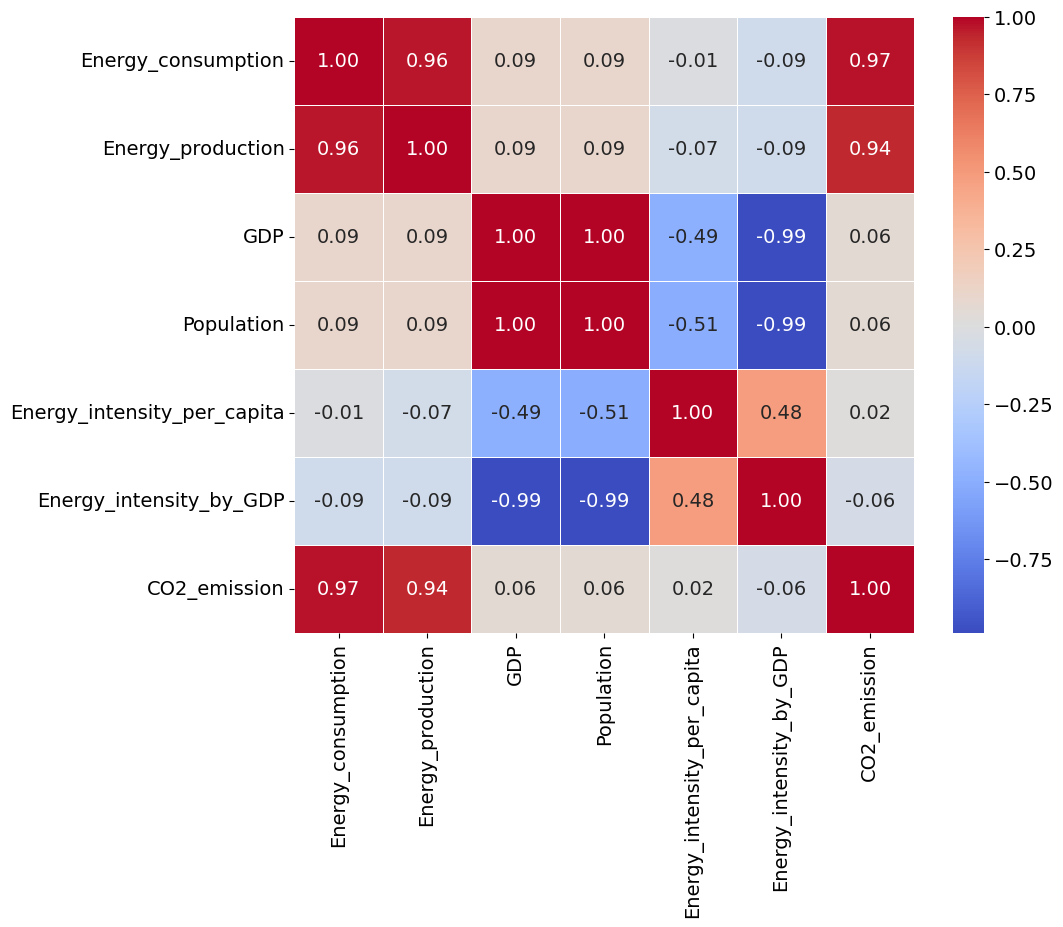

In [58]:


# Filtra las filas correspondientes a Estados Unidos
df_usa_energy = df_energy[df_energy['Country'] == 'United States']

# Selecciona solo columnas numéricas (excluyendo 'Unnamed' y 'Year') para el análisis de correlación
numeric_columns = df_usa_energy.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(['Unnamed: 0', 'Year'])  # Excluir 'Unnamed: 0' y 'Year'
df_usa_numeric = df_usa_energy[numeric_columns]

# Análisis Exploratorio de Datos (EDA)
# Histograma de variables numéricas
df_usa_numeric.hist(bins=20, figsize=(15, 10))
plt.show()

# Normalización de datos para la matriz de correlación
scaler = StandardScaler()
df_usa_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_usa_numeric), columns=df_usa_numeric.columns)

# Matriz de correlación
correlation_matrix_usa = df_usa_numeric_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_usa, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()




# Conclusiones del análisis: 'Energy.csv' #



1. **Energy Consumption y Energy Production:**
   - **Análisis:** Existe una correlación positiva muy fuerte (0.96) entre el consumo y la producción de energía. Esto sugiere que los países que consumen más energía también tienden a producir más.
   - **Conclusiones:** La alta correlación indica una relación directa entre el consumo y la producción de energía. Puede deberse a que países con altas demandas energéticas tienden a tener una capacidad de producción proporcionalmente alta.

2. **Energy Consumption y GDP:**
   - **Análisis:** La correlación positiva es débil (0.09), lo que indica que el consumo de energía no está fuertemente vinculado al Producto Interno Bruto (PIB) de un país.
   - **Conclusiones:** Aunque hay una relación positiva, no es lo suficientemente fuerte como para afirmar que el aumento en el consumo de energía se traduce directamente en un aumento proporcional en el PIB.

3. **Energy Consumption y Population:**
   - **Análisis:** La correlación negativa es fuerte (-0.99), sugiriendo una relación inversa entre el consumo de energía y la población de un país.
   - **Conclusiones:** Esto podría indicar que, en general, países más densamente poblados tienden a tener un menor consumo de energía per cápita.

4. **Energy Consumption y Energy Intensity per Capita:**
   - **Análisis:** Hay una correlación positiva moderada (0.48), indicando una relación entre el consumo de energía y la intensidad energética per cápita.
   - **Conclusiones:** Países con un mayor consumo de energía pueden tener una mayor intensidad energética per cápita, lo que podría deberse a una mayor eficiencia energética en algunos casos.

5. **Energy Consumption y Energy Intensity by GDP:**
   - **Análisis:** La correlación positiva es débil (0.04), indicando una relación limitada entre el consumo de energía y la intensidad energética en función del PIB.
   - **Conclusiones:** Aunque hay una relación, no es lo suficientemente fuerte como para afirmar que el aumento en el consumo de energía está directamente relacionado con la intensidad energética en función del PIB.

6. **Energy Consumption y CO2 Emission:**
   - **Análisis:** Hay una correlación negativa débil (-0.06), sugiriendo una relación débil entre el consumo de energía y las emisiones de CO2.
   - **Conclusiones:** Aunque la relación es débil, podría indicar que algunos países con altos niveles de consumo de energía han implementado tecnologías más limpias para reducir las emisiones de CO2.



In [10]:
# Lectura del archivo 'ANNOTATIONS-AUDIO'

annotations_audio = pd.read_csv('DATASETS\\annotations-AUDIO.csv')
annotations_audio.head(5)

,split,sensor_id,audio_filename,annotator_id,borough,block,latitude,longitude,year,week,...,7-X_other-unknown-human-voice_proximity,8-1_dog-barking-whining_proximity,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence
0,test,0,00_026884.wav,-6,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,1,0,-1,-1,-1,-1,-1
1,test,0,00_026884.wav,-4,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
2,test,0,00_026884.wav,-3,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
3,test,0,00_026884.wav,-1,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,test,0,00_026884.wav,0,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,0,1,0,0,0,0,0


In [68]:
annotations_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62022 entries, 0 to 62021
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   split                                         62022 non-null  object 
 1   sensor_id                                     62022 non-null  int64  
 2   audio_filename                                62022 non-null  object 
 3   annotator_id                                  62022 non-null  int64  
 4   borough                                       62022 non-null  int64  
 5   block                                         62022 non-null  int64  
 6   latitude                                      62022 non-null  float64
 7   longitude                                     62022 non-null  float64
 8   year                                          62022 non-null  int64  
 9   week                                          62022 non-null 

In [12]:
# Verificar si hay valores nulos en todo el DataFrame
valores_nulos = annotations_audio.isnull().any().any()

if valores_nulos:
    print("¡Hay valores nulos en el DataFrame!")
    # Muestra la cantidad de valores nulos por columna
    print(annotations_audio.isnull().sum())
else:
    print("No hay valores nulos en el DataFrame.")

No hay valores nulos en el DataFrame.


In [61]:
print (annotations_audio.describe())

          sensor_id  annotator_id       borough         block     latitude  \
count  62022.000000  62022.000000  62022.000000  62022.000000  62022.00000   
mean      20.222066   3041.794234      1.114943    593.343878     40.73031   
std       14.297138   1981.714943      0.472653    251.373182      0.01348   
min        0.000000     -6.000000      1.000000     75.000000     40.67517   
25%        6.000000    639.000000      1.000000    535.000000     40.72898   
50%       20.000000   3743.000000      1.000000    547.000000     40.73033   
75%       32.000000   4623.000000      1.000000    550.000000     40.73142   
max       61.000000   6659.000000      4.000000   2613.000000     40.77991   

          longitude          year          week           day          hour  \
count  62022.000000  62022.000000  62022.000000  62022.000000  62022.000000   
mean     -73.993044   2017.591000     26.274838      2.907259     12.417578   
std        0.010074      0.778948     16.169650      1.92572

In [ ]:
# encontrar latitud y longitu de eeuu o nueva york del archivo annotations-audio

In [13]:
df_yellow = pd.read_parquet('DATASETS\yellow_tripdata_2023-09.parquet')
df_yellow.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,1.0,0.80,1.0,N,163,230,2,6.5,3.5,0.5,0.00,0.0,1.0,11.50,2.5,0.00
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,2.0,2.34,1.0,N,236,233,1,14.2,1.0,0.5,2.00,0.0,1.0,21.20,2.5,0.00
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,1.0,1.62,1.0,N,162,236,1,8.6,1.0,0.5,2.00,0.0,1.0,15.60,2.5,0.00
3,2,2023-09-01 00:45:45,2023-09-01 00:47:37,1.0,0.74,1.0,N,141,229,1,5.1,1.0,0.5,1.00,0.0,1.0,11.10,2.5,0.00
4,2,2023-09-01 00:01:23,2023-09-01 00:38:05,1.0,9.85,1.0,N,138,230,1,45.0,6.0,0.5,17.02,0.0,1.0,73.77,2.5,1.75


In [14]:
df_yellow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846722 entries, 0 to 2846721
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [15]:
print(df_yellow.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')


# 1.  Entender la Relación entre las Variables:
Para entender la relación entre las variables, observa las estadísticas descriptivas y visualizaciones: 


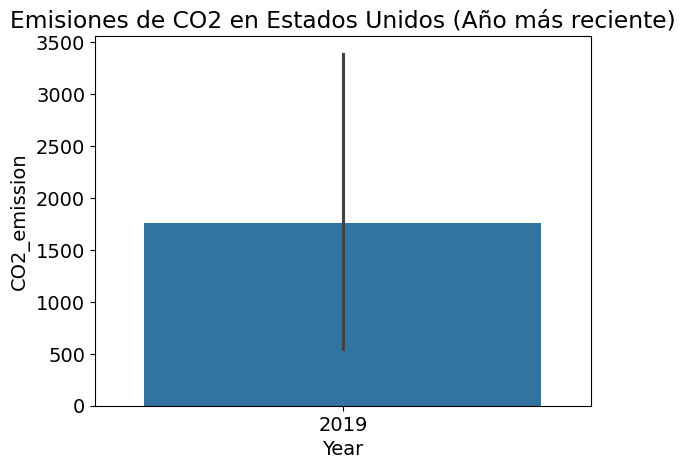

In [16]:


# DataFrame de contaminación del aire
contaminacion = df_energy[['Country', 'Year', 'CO2_emission']]

# Filtra las emisiones de CO2 solo para Estados Unidos y el año más reciente
contaminacion_usa_latest = contaminacion[(contaminacion['Country'] == 'United States') & (contaminacion['Year'] == contaminacion['Year'].max())]

# Visualización de emisiones de CO2 para Estados Unidos en el año más reciente
sns.barplot(x='Year', y='CO2_emission', data=contaminacion_usa_latest)
plt.title('Emisiones de CO2 en Estados Unidos (Año más reciente)')
plt.show()

